<a href="https://colab.research.google.com/github/IAgroup19/AIProject/blob/main/MC906_Renewable_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Importando Bibliotecas

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

# Importando Dados

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import subprocess
import os
# df = pd.read_csv("/content/gdrive/MyDrive/MC906/renewable-share-energy.csv")
df = pd.read_csv("/content/gdrive/MyDrive/DadosTrabalhoIA/renewable-share-energy.csv")

df.head()

,Entity,Code,Year,Renewables (% equivalent primary energy)
0,Africa,NaN,1965,5.747495
1,Africa,NaN,1966,6.122062
2,Africa,NaN,1967,6.325731
3,Africa,NaN,1968,7.005293
4,Africa,NaN,1969,7.956088


In [ ]:
df = pd.read_csv("/content/renewable-share-energy.csv")

In [ ]:
df.shape

(5603, 4)

In [ ]:
df.columns

Index(['Entity', 'Code', 'Year', 'Renewables (% equivalent primary energy)'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5603 entries, 0 to 5602
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    5603 non-null   object 
 1   Code                                      4292 non-null   object 
 2   Year                                      5603 non-null   int64  
 3   Renewables (% equivalent primary energy)  5603 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 175.2+ KB


In [ ]:
df["Entity"].unique()

array(['Africa', 'Africa (BP)', 'Algeria', 'Argentina', 'Asia',
       'Asia Pacific (BP)', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria',
       'CIS (BP)', 'Canada', 'Central America (BP)', 'Chile', 'China',
       'Colombia', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Eastern Africa (BP)', 'Ecuador', 'Egypt', 'Estonia', 'Europe',
       'Europe (BP)', 'European Union (27)', 'Finland', 'France',
       'Germany', 'Greece', 'High-income countries', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Latvia', 'Lithuania', 'Lower-middle-income countries',
       'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa (BP)',
       'Middle East (BP)', 'Morocco', 'Netherlands', 'New Zealand',
       'Non-OECD (BP)', 'North America', 'North America (BP)',
       'North Macedonia', 'Norway', 'OECD (BP)', 'Oceania', 'Oman',
     

# Tratando Dados

In [ ]:
#Podemos remover a coluna de códigos dos países
df.drop(columns=['Code'], inplace=True)

In [ ]:
#Vamos utilizar apenas as linhas de dados que representam a média global
global_df = df[df['Entity'] == 'World']
global_df.describe()

,Year,Renewables (% equivalent primary energy)
count,57.000000,57.000000
mean,1993.000000,7.932943
std,16.598193,1.796049
min,1965.000000,5.997481
25%,1979.000000,6.596381
50%,1993.000000,7.406497
75%,2007.000000,7.881373
max,2021.000000,13.470907


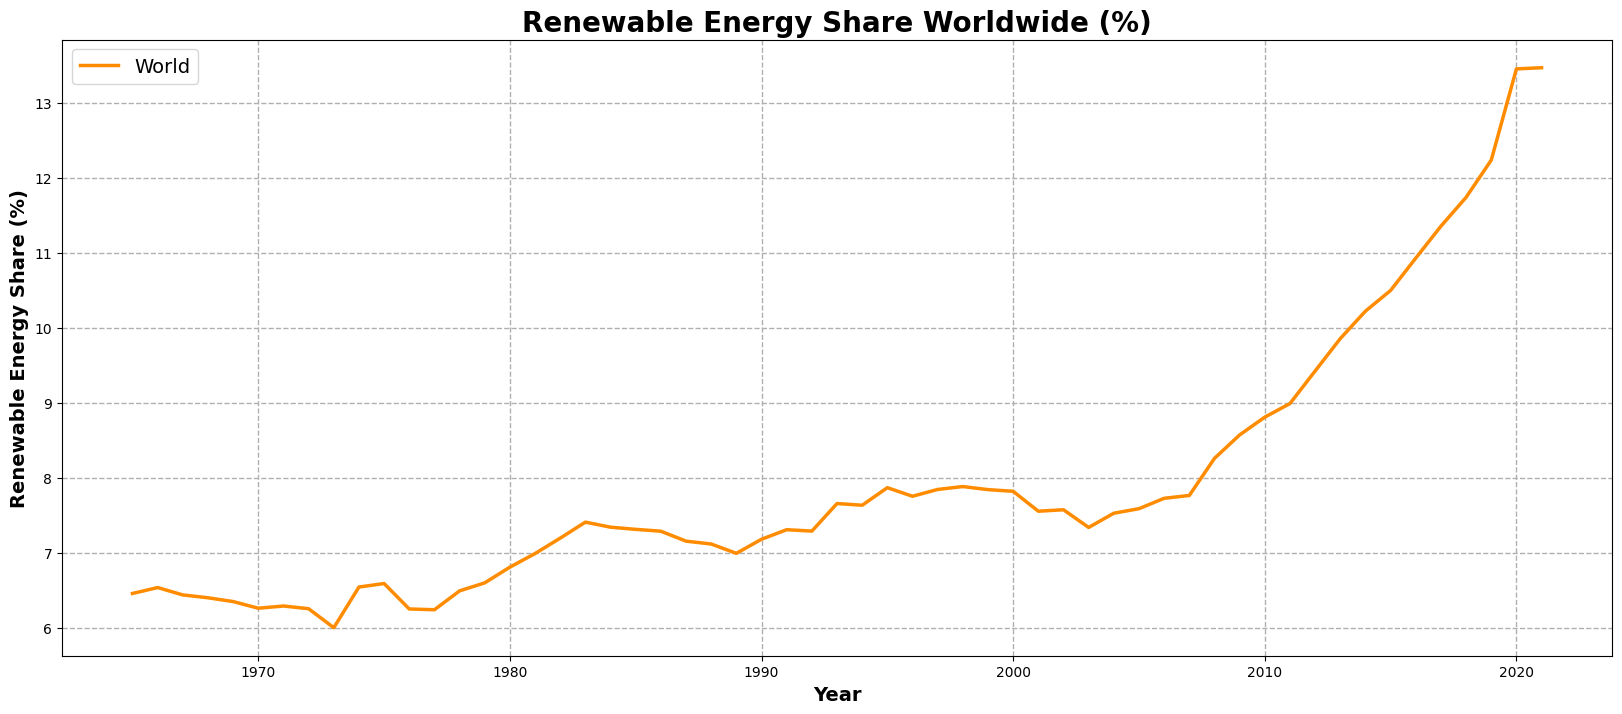

In [ ]:
#Visualização dos dados
title_font_size = 20
label_font_size = 14
line_width = 2.5

plt.figure(figsize=(20, 8))
plt.plot(global_df['Year'], global_df['Renewables (% equivalent primary energy)'], label="World", linewidth=line_width, color='darkorange')

plt.title('Renewable Energy Share Worldwide (%)', fontsize=title_font_size, fontweight='bold')
plt.xlabel('Year', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Renewable Energy Share (%)', fontsize=label_font_size, fontweight='bold')

plt.legend(fontsize=label_font_size)
plt.grid(True, linestyle='--', linewidth=1)

plt.show()

# Scoring

In [ ]:
col = ['Algorithm', 'r2 score', 'accuracy', 'MAE', 'MSE']
df_results = pd.DataFrame(columns=col)

In [ ]:
# def scoring(model, test_features, test_labels):
def scoring(model, str_model, test_features, test_labels, i):
  predictions = model.predict(test_features)
  mae = mean_absolute_error(test_labels, predictions)
  mse = mean_squared_error(test_labels, predictions)
  r2 = r2_score(test_labels, predictions)
  errors = abs(predictions - test_labels)
  mape = 100 * np.mean(errors / test_labels)
  accuracy = 100 - mape
  print('Model Performance')
  print('Mean Absolute Error: {:0.4f}.'.format(mae))
  print('Mean Squared Error: {:0.4f}.'.format(mse))
  print('R^2 Score = {:0.4f}.'.format(r2))
  print('Accuracy = {:0.2f}%.'.format(accuracy))
  df_results.loc[i] = [str_model, round(r2, 5), round(accuracy, 5), round(mae, 5),  round(mse, 5)]

# Regressão Polinomial

## Utilizando a biblioteca sklearn

In [ ]:
#Vamos separar a variável independente da dependente
#Dependente
y = np.asarray(global_df['Renewables (% equivalent primary energy)'].values.tolist())

# Independente
X = np.asarray(global_df['Year'].values.tolist())

In [ ]:
#Conferindo shape das listas
print("Shape da lista de valores independentes ",X.shape)
print("Shape da lista de valores dependentes ",y.shape)

Shape da lista de valores independentes  (57,)
Shape da lista de valores dependentes  (57,)


In [ ]:
#Vamos representar os anos por números crescentes iniciando em 1
X = X - 1964
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57])

In [ ]:
y

array([ 6.4545183,  6.5335774,  6.435174 ,  6.397144 ,  6.346678 ,
        6.2576427,  6.2873034,  6.251033 ,  5.9974813,  6.540394 ,
        6.587483 ,  6.2476835,  6.237358 ,  6.489273 ,  6.596381 ,
        6.8060145,  6.9877205,  7.1932316,  7.406497 ,  7.3390236,
        7.3102527,  7.285367 ,  7.1527147,  7.114733 ,  6.9900603,
        7.1784005,  7.305675 ,  7.2868786,  7.6548657,  7.6321387,
        7.866311 ,  7.751967 ,  7.842729 ,  7.8813725,  7.840555 ,
        7.817928 ,  7.552363 ,  7.5717835,  7.3357315,  7.5255384,
        7.586022 ,  7.724513 ,  7.762623 ,  8.257497 ,  8.570196 ,
        8.807657 ,  8.989022 ,  9.423264 ,  9.855674 , 10.222232 ,
       10.498747 , 10.930195 , 11.355979 , 11.741059 , 12.2379875,
       13.455194 , 13.470907 ])

In [ ]:
#Ajustando os arrays para um formato adequado
X = X.reshape(-1,1)
y = y.reshape(-1,1)

Melhor grau de polinômio 4 com RMSE 0.2621405312014661


Text(0, 0.5, 'RMSE')

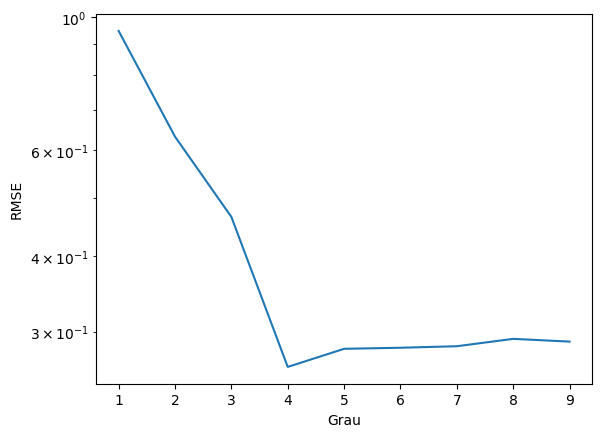

In [ ]:
#Visualização de RMSE para diferentes graus de polinômios
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rmses = []
degrees = np.arange(1, 10)
min_rmse = 1e10
min_deg = 0

for degree in degrees:
    #Adiciona colunas de potências dos valores em X
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)

    #Realiza o fit no modelo da regrassão polinomial
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)

    #Compara a predição do modelo com os dados de teste
    X_test_poly = poly_features.fit_transform(X_test)
    predict = poly_reg.predict(X_test_poly)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    rmses.append(rmse)

    #Validação do menor RMSE
    if rmse < min_rmse:
        min_rmse = rmse
        min_deg = degree

#Plot dos resultados
print('Melhor grau de polinômio {} com RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Grau')
ax.set_ylabel('RMSE')

Escolheremos o grau 4, para obter um RMSE baixo, mas ao mesmo tempo evitar overfitting

In [ ]:
poly_features = PolynomialFeatures(degree=4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_poly_train = poly_features.fit_transform(X_train)
X_poly_train

array([[1.0000000e+00, 1.5000000e+01, 2.2500000e+02, 3.3750000e+03,
        5.0625000e+04],
       [1.0000000e+00, 5.5000000e+01, 3.0250000e+03, 1.6637500e+05,
        9.1506250e+06],
       [1.0000000e+00, 2.6000000e+01, 6.7600000e+02, 1.7576000e+04,
        4.5697600e+05],
       [1.0000000e+00, 2.9000000e+01, 8.4100000e+02, 2.4389000e+04,
        7.0728100e+05],
       [1.0000000e+00, 1.0000000e+01, 1.0000000e+02, 1.0000000e+03,
        1.0000000e+04],
       [1.0000000e+00, 4.0000000e+00, 1.6000000e+01, 6.4000000e+01,
        2.5600000e+02],
       [1.0000000e+00, 5.1000000e+01, 2.6010000e+03, 1.3265100e+05,
        6.7652010e+06],
       [1.0000000e+00, 3.1000000e+01, 9.6100000e+02, 2.9791000e+04,
        9.2352100e+05],
       [1.0000000e+00, 2.0000000e+00, 4.0000000e+00, 8.0000000e+00,
        1.6000000e+01],
       [1.0000000e+00, 4.4000000e+01, 1.9360000e+03, 8.5184000e+04,
        3.7480960e+06],
       [1.0000000e+00, 5.0000000e+00, 2.5000000e+01, 1.2500000e+02,
        6.25

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train,y_train)
lin_reg.intercept_, lin_reg.coef_ #Checa o fator de bias e os coeficientes obtidos na regressão

(array([6.74243925]),
 array([[ 0.00000000e+00, -1.75687599e-01,  1.89978268e-02,
         -6.03304602e-04,  6.36388470e-06]]))

In [ ]:
X_test_poly = poly_features.fit_transform(X_test)
predict = lin_reg.predict(X_test_poly)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
print("RMSE obtido:{}".format(rmse))
scoring(lin_reg, "LinearRegression()", X_test_poly, y_test, 1)

RMSE obtido:0.2334319997841055
Model Performance
Mean Absolute Error: 0.1959.
Mean Squared Error: 0.0545.
R^2 Score = 0.9782.
Accuracy = 97.58%.


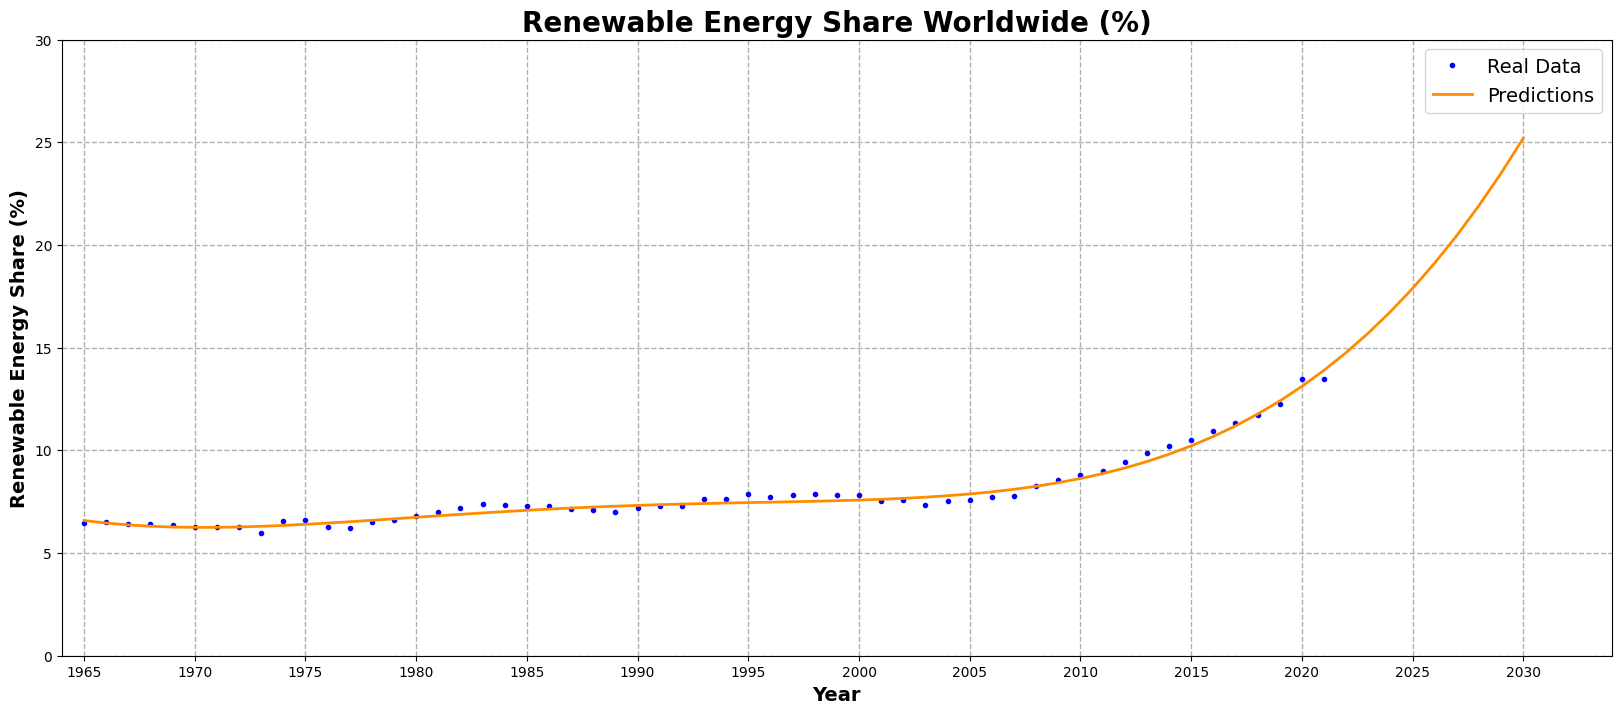

In [ ]:
#Visualização dos resultados
X_new = np.arange(1, 67, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
X_new = X_new.reshape(-1,1)
X_new_poly = poly_features.fit_transform(X_new)
y_predict = lin_reg.predict(X_new_poly)

title_font_size = 20
label_font_size = 14
line_width = 2.5

fig,ax = plt.subplots()
fig.set_size_inches(20, 8)
ax.plot(X,y,'b.', label = 'Real Data')
ax.plot(X_new,y_predict,'-',linewidth=2, label = 'Predictions', color='darkorange')
ax.axis([0,70,0,30])
plt.xticks([i for i in range(1, 67, 5)], [i + 1964 for i in range(1, 67, 5)]) #Incrementa os valores em X para que eles representam os anos

plt.title('Renewable Energy Share Worldwide (%)', fontsize=title_font_size, fontweight='bold')
plt.xlabel('Year', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Renewable Energy Share (%)', fontsize=label_font_size, fontweight='bold')

plt.legend(fontsize=label_font_size)
plt.grid(True, linestyle='--', linewidth=1)

plt.show()

## Implementando do zero




Funções de utilidade

In [ ]:
def split_data(X,y,test_size=0.3,random_state=0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    data_test_size = int(X.shape[0] * test_size)

    #Separa os dados de treino e os de teste
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [ ]:
#Função de visualização
def plot_graphs(x, y, model):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  x_new = np.arange(1,67,1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
  x_new = x_new.reshape(-1,1)
  ax1.scatter(x, y, color="yellow", label="True Data")
  ax1.set_xticks([i for i in range(1, 67, 5)], [i + 1964 for i in range(1, 67, 5)]) #Incrementa os valores em X para que eles representam os anos
  ax1.plot(x_new, model.predict(x_new), color="red", label="Model Prediction")
  ax1.set_xlabel("Year")
  ax1.set_ylabel("Renewable Energy Share (%)")
  ax1.set_title("Renewable Energy Share Worldwide (%)")
  ax1.legend()

  equation = f"y = {model.c}"
  for i, coeff in enumerate(model.beta):
      equation += f" + {coeff} * x^{i+1}"
  print(equation)

  ax2.plot(model.itr, model.mse)
  ax2.set_xlabel("Iterations")
  ax2.set_ylabel("MSE")
  ax2.set_title("Mean Squared Error")

  plt.tight_layout()
  plt.show()

Criando classe de regressão linear

In [ ]:
class PolyRegression:

  def __init__(self):
    self.beta = None
    self.c = None
    self.degree = None
    self.mean = None
    self.std = None
    self.mse = []
    self.itr = []

  def polyrise(self, X, degree, interactions=True):
    newx = np.asarray(X)

    if newx.ndim == 1:
        newx = newx.reshape(-1, 1)
    X_poly = newx.copy()

    for i in range(2, degree + 1):
        X_poly = np.append(X_poly, newx ** i, axis=1)

    if interactions:
        for i in range(newx.shape[1]):
            for j in range(i + 1, newx.shape[1]):
                interx = newx[:, i] * newx[:, j]
                X_poly = np.append(X_poly, interx.reshape(-1, 1), axis=1)
    return X_poly

  def normalize(self, X):
    smallvalue = 1e-10

    X = (X - self.mean) / (self.std + smallvalue)
    return X

  def fit(self, X, y, lr=0.01, epochs=100, degree=1, interactions=True):
    self.degree = degree

    X_poly = self.polyrise(X, degree, interactions)
    y = np.asarray(y)
    if y.ndim == 1:
      y = y.reshape(-1,1)

    n_samples, n_features = X_poly.shape
    n_outputs = y.shape[1]
    self.beta = np.zeros((n_features, n_outputs))
    self.c = np.zeros(n_outputs)
    self.mean = np.mean(X_poly, axis=0)
    self.std = np.std(X_poly, axis=0)
    X_norm = self.normalize(X_poly)

    for i in range(epochs):
        self.itr.append(i)
        pred = X_norm.dot(self.beta) + self.c
        error = y - pred
        self.mse.append(np.mean(np.absolute(error)))
        db = -2 / len(X_norm) * X_norm.T.dot(error)
        dc = (-2) * np.mean(error, axis=0)
        self.beta = self.beta - (lr * db)
        self.c = self.c - (lr * dc)
    return self

  def predict(self, X):
    if self.beta is None or self.c is None:
        raise RuntimeError("Modelo ainda não foi treinado. Chame model.fit() antes de model.predict()")
    X_poly = self.polyrise(X, self.degree)
    X_norm = self.normalize(X_poly)
    return X_norm.dot(self.beta) + self.c

Melhor grau de polinômio 10 com RMSE 0.31707241546505965


Text(0, 0.5, 'RMSE')

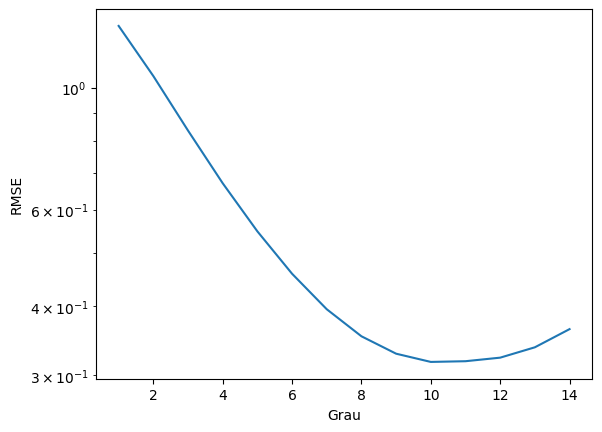

In [ ]:
#Visualização de RMSE para diferentes graus de polinômios
X_train, y_train, X_test, y_test = split_data(X,y)

rmses = []
degrees = np.arange(1, 15)
min_rmse = 1e10
min_deg = 0

for degree in degrees:
    #Realiza o fit no modelo da regrassão polinomial
    model = PolyRegression()
    model.fit(X_train, y_train,0.001,4000,degree,True)

    #Compara a predição do modelo com os dados de teste
    predict = model.predict(X_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    rmses.append(rmse)

    #Validação do menor RMSE
    if rmse < min_rmse:
        min_rmse = rmse
        min_deg = degree

#Plot dos resultados
print('Melhor grau de polinômio {} com RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmses)
ax.set_yscale('log')
ax.set_xlabel('Grau')
ax.set_ylabel('RMSE')

Escolheremos o grau 8, para obter um RMSE baixo, mas ao mesmo tempo evitar overfitting

In [ ]:
X_train, y_train, X_test, y_test = split_data(X,y)

y = [7.81737872] + [0.28029969] * x^1 + [0.11877245] * x^2 + [0.07864636] * x^3 + [0.10823137] * x^4 + [0.16587107] * x^5 + [0.2295343] * x^6 + [0.28910889] * x^7 + [0.34065836] * x^8


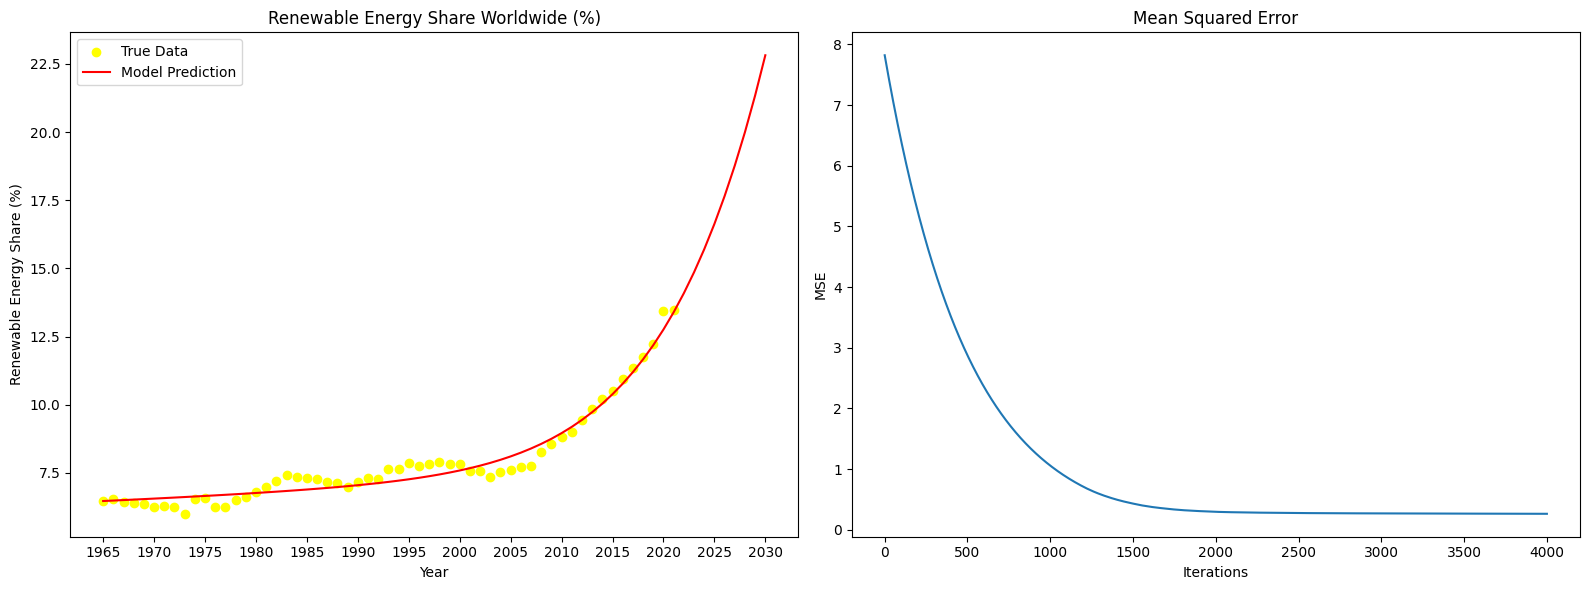

Model Performance
Mean Absolute Error: 0.3009.
Mean Squared Error: 0.1246.
R^2 Score = 0.9726.
Accuracy = 96.24%.


In [ ]:
model = PolyRegression()
model.fit(X_train,y_train,0.001,4000,8,True)
plot_graphs(X,y,model)
scoring(model, "Implemented LinearRegression()", X_test, y_test, 2)

# Random Forest

In [ ]:
#Separando as features e targets
#Feature
x_0 = np.asarray(global_df[['Year']].values.tolist())

#Target
y_0 = np.array(global_df['Renewables (% equivalent primary energy)'])


## Dataset: 1964 a 2021

In [ ]:
mid_point = 0

In [ ]:
x = x_0[mid_point:]
y = y_0[mid_point:]

In [ ]:
#Conferindo shape das listas
print("Shape da lista de valores independentes ",x.shape)
print("Shape da lista de valores dependentes ",y.shape)

Shape da lista de valores independentes  (57, 1)
Shape da lista de valores dependentes  (57,)


In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
# Divisão de dados temporais
tscv = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tscv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo
    modelRF = RandomForestRegressor(n_estimators=10)
    modelRF.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)

    # Avaliação
    scoring(modelRF, "RandomForestRegressor() Time Series Split (64-021)", x_test, y_test, 3)

Model Performance
Mean Absolute Error: 0.1820.
Mean Squared Error: 0.0490.
R^2 Score = -0.0460.
Accuracy = 97.14%.
Model Performance
Mean Absolute Error: 0.3798.
Mean Squared Error: 0.2079.
R^2 Score = -2.1137.
Accuracy = 94.41%.
Model Performance
Mean Absolute Error: 0.4128.
Mean Squared Error: 0.1753.
R^2 Score = -34.9949.
Accuracy = 94.36%.
Model Performance
Mean Absolute Error: 0.1561.
Mean Squared Error: 0.0345.
R^2 Score = -2.3238.
Accuracy = 97.80%.
Model Performance
Mean Absolute Error: 0.3773.
Mean Squared Error: 0.1801.
R^2 Score = -3.7718.
Accuracy = 95.12%.
Model Performance
Mean Absolute Error: 0.1015.
Mean Squared Error: 0.0143.
R^2 Score = -0.0114.
Accuracy = 98.69%.
Model Performance
Mean Absolute Error: 0.1044.
Mean Squared Error: 0.0190.
R^2 Score = -0.2046.
Accuracy = 98.60%.
Model Performance
Mean Absolute Error: 0.7820.
Mean Squared Error: 0.7993.
R^2 Score = -3.2574.
Accuracy = 91.02%.
Model Performance
Mean Absolute Error: 1.3978.
Mean Squared Error: 2.2226.
R^2 

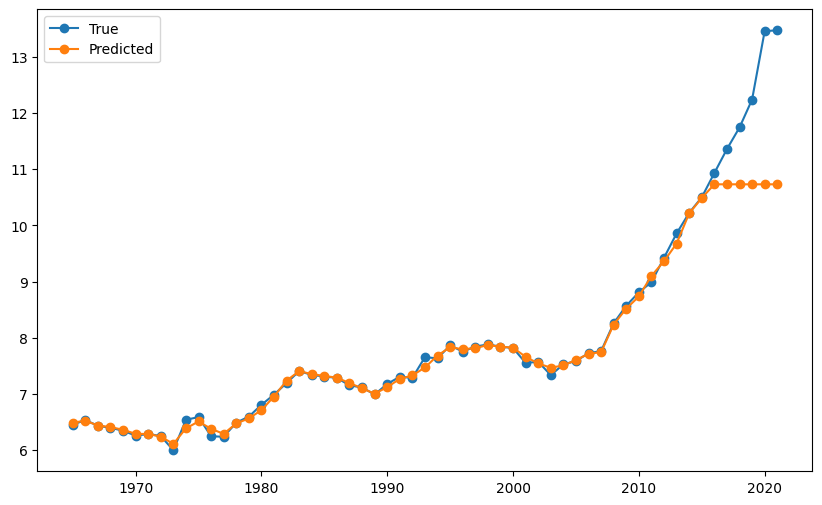

In [ ]:
# Visualização do resultado
y_pred = modelRF.predict(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x, y_pred, label='Predicted', marker='o')
plt.legend()
plt.show()

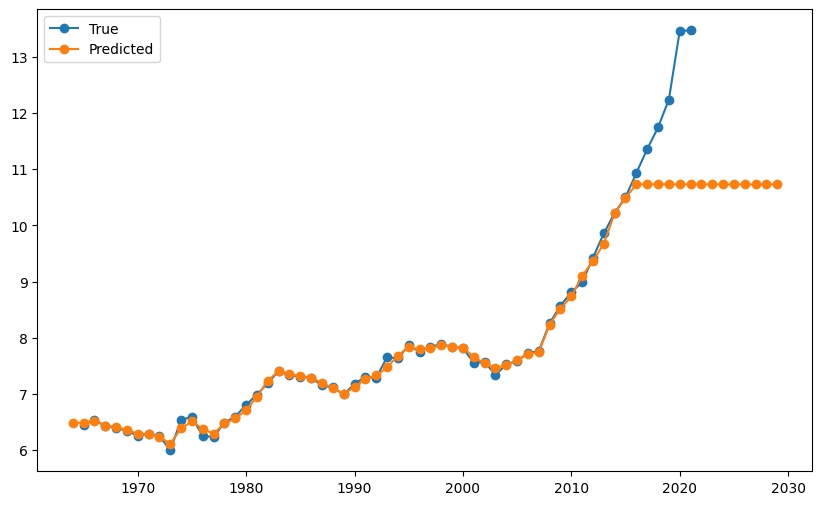

In [ ]:
x_new = np.arange(1964, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = modelRF.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted', marker='o')
plt.legend()
plt.show()

In [ ]:
#Divisão de dados 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)

# Avaliação
scoring(model, "RandomForestRegressor() 0.25 Split (64-021)", x_test, y_test, 4)

Model Performance
Mean Absolute Error: 0.1999.
Mean Squared Error: 0.0682.
R^2 Score = 0.9863.
Accuracy = 73.03%.


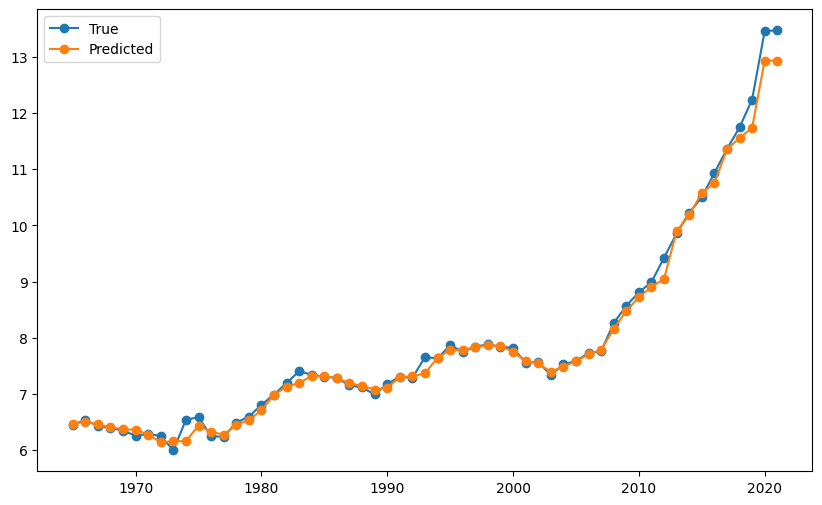

In [ ]:
# Visualização do resultado
y_pred = model.predict(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x, y_pred, label='Predicted', marker='o')
plt.legend()
plt.show()

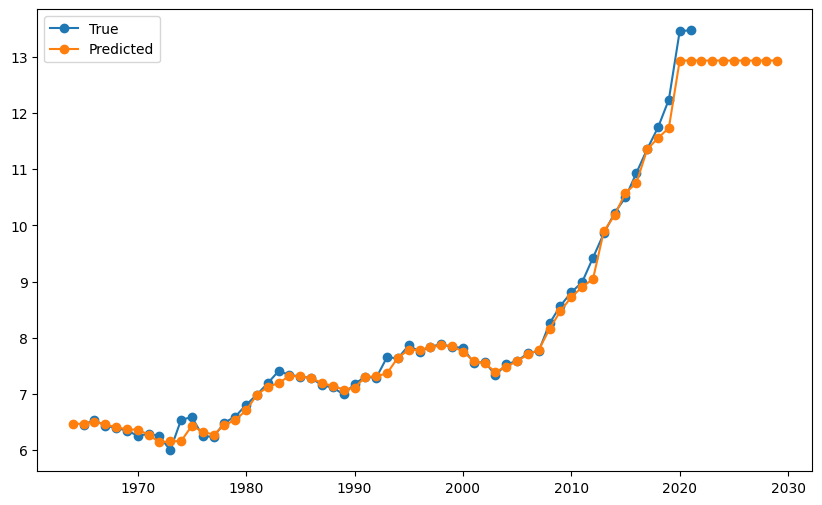

In [ ]:
x_new = np.arange(1964, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = model.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted', marker='o')
plt.legend()
plt.show()

## Dataset: 2000 a 2021

In [ ]:
mid_point = 35

In [ ]:
x = x_0[mid_point:]
y = y_0[mid_point:]

#Conferindo shape das listas
print("Shape da lista de valores independentes ",x.shape)
print("Shape da lista de valores dependentes ",y.shape)

Shape da lista de valores independentes  (22, 1)
Shape da lista de valores dependentes  (22,)


In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
# Divisão de dados temporais
tscv = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tscv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo
    modelRF = RandomForestRegressor(n_estimators=10)
    modelRF.fit(x_train, y_train.ravel())
    y_pred = modelRF.predict(x_test)

    # Avaliação
    scoring(modelRF, "RandomForestRegressor() Time Series Split (000-021)", x_test, y_test, 5)

Model Performance
Mean Absolute Error: 0.1517.
Mean Squared Error: 0.0369.
R^2 Score = -1.6524.
Accuracy = 97.94%.
Model Performance
Mean Absolute Error: 0.1964.
Mean Squared Error: 0.0395.
R^2 Score = -42.1949.
Accuracy = 97.40%.
Model Performance
Mean Absolute Error: 0.1696.
Mean Squared Error: 0.0291.
R^2 Score = -79.2597.
Accuracy = 97.81%.
Model Performance
Mean Absolute Error: 0.6902.
Mean Squared Error: 0.5008.
R^2 Score = -19.4862.
Accuracy = 91.83%.
Model Performance
Mean Absolute Error: 0.4532.
Mean Squared Error: 0.2136.
R^2 Score = -24.9791.
Accuracy = 94.92%.
Model Performance
Mean Absolute Error: 0.8568.
Mean Squared Error: 0.7808.
R^2 Score = -15.7036.
Accuracy = 91.16%.
Model Performance
Mean Absolute Error: 0.5915.
Mean Squared Error: 0.3690.
R^2 Score = -18.3022.
Accuracy = 94.31%.
Model Performance
Mean Absolute Error: 0.8625.
Mean Squared Error: 0.7892.
R^2 Score = -16.4132.
Accuracy = 92.29%.
Model Performance
Mean Absolute Error: 0.7895.
Mean Squared Error: 0.6850

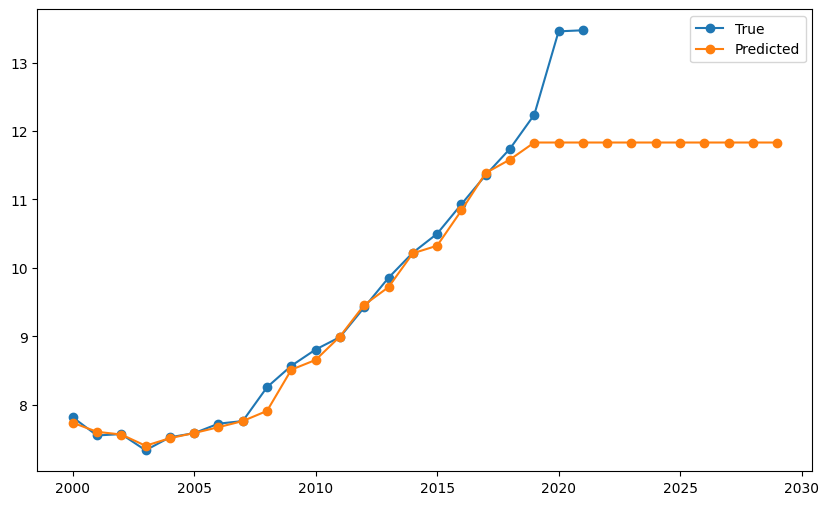

In [ ]:
x_new = np.arange(2000, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = modelRF.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted', marker='o')
plt.legend()
plt.show()

In [ ]:
#Divisão de dados 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train.ravel())
y_pred = model.predict(x_test)

# Avaliação
scoring(model, "RandomForestRegressor() 0.25 Split (000-021)", x_test, y_test, 6)

Model Performance
Mean Absolute Error: 0.1808.
Mean Squared Error: 0.0405.
R^2 Score = 0.9855.
Accuracy = 80.73%.


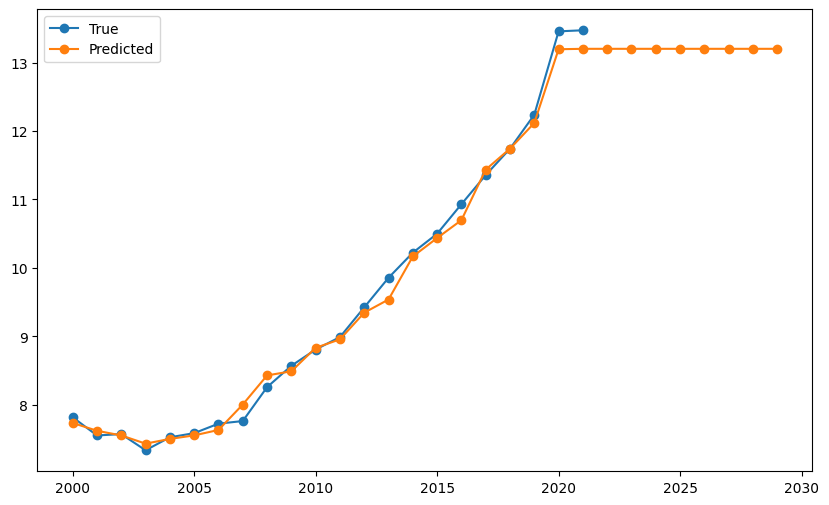

In [ ]:
x_new = np.arange(2000, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = model.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted', marker='o')
plt.legend()
plt.show()

# XGBoost

In [ ]:
import xgboost as xgb

## Dataset: 1964 a 2021

In [ ]:
mid_point = 0

In [ ]:
x = x_0[mid_point:]
y = y_0[mid_point:]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
model_xgb = xgb.XGBRegressor()

model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_test)

scoring(model_xgb, "XGBRegressor() 0.25 Split (64-021)", x_test, y_test, 7)

Model Performance
Mean Absolute Error: 0.2804.
Mean Squared Error: 0.2441.
R^2 Score = 0.9424.
Accuracy = 96.98%.


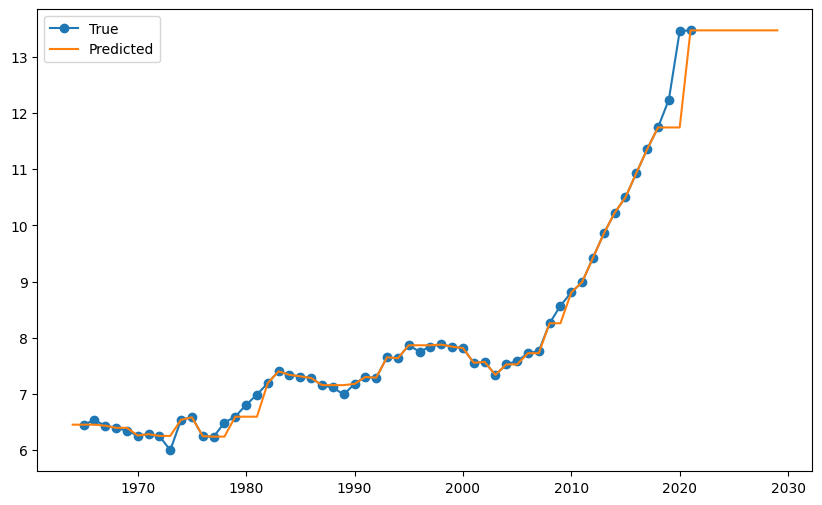

In [ ]:
x_new = np.arange(1964, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = model_xgb.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Divisão de dados temporais
tscv = TimeSeriesSplit(n_splits=10)

for train_index, test_index in tscv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo
    model_xgb = xgb.XGBRegressor()
    model_xgb.fit(x_train, y_train)
    y_pred_xgb = model_xgb.predict(x_test)

    # Avaliação
    scoring(model_xgb, "XGBRegressor() Time Series Split (64-021)", x_test, y_test, 8)

Model Performance
Mean Absolute Error: 0.1837.
Mean Squared Error: 0.0482.
R^2 Score = -0.0309.
Accuracy = 97.11%.
Model Performance
Mean Absolute Error: 0.3794.
Mean Squared Error: 0.2074.
R^2 Score = -2.1062.
Accuracy = 94.41%.
Model Performance
Mean Absolute Error: 0.3204.
Mean Squared Error: 0.1075.
R^2 Score = -21.0848.
Accuracy = 95.62%.
Model Performance
Mean Absolute Error: 0.1456.
Mean Squared Error: 0.0293.
R^2 Score = -1.8288.
Accuracy = 97.95%.
Model Performance
Mean Absolute Error: 0.3411.
Mean Squared Error: 0.1494.
R^2 Score = -2.9570.
Accuracy = 95.59%.
Model Performance
Mean Absolute Error: 0.1147.
Mean Squared Error: 0.0154.
R^2 Score = -0.0852.
Accuracy = 98.52%.
Model Performance
Mean Absolute Error: 0.0936.
Mean Squared Error: 0.0158.
R^2 Score = -0.0011.
Accuracy = 98.75%.
Model Performance
Mean Absolute Error: 0.7541.
Mean Squared Error: 0.7564.
R^2 Score = -3.0289.
Accuracy = 91.35%.
Model Performance
Mean Absolute Error: 1.1982.
Mean Squared Error: 1.7045.
R^2 

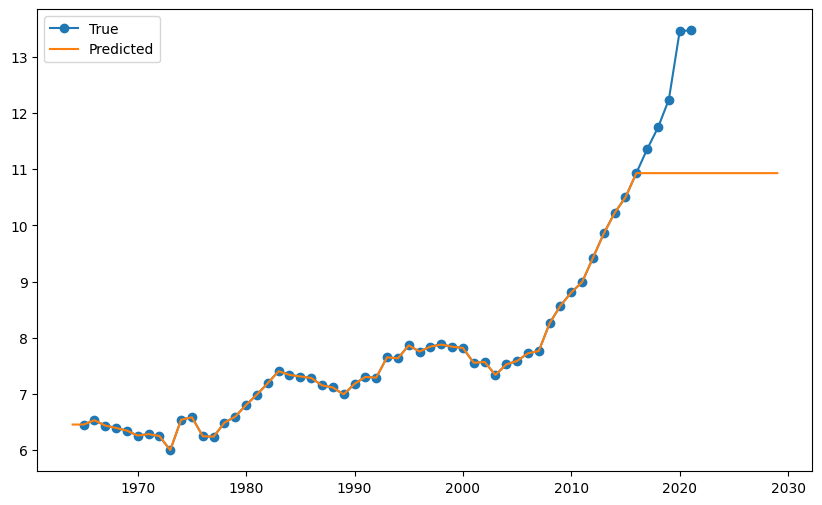

In [ ]:
x_new = np.arange(1964, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = model_xgb.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted')
plt.legend()
plt.show()

## Dataset: 2000 a 2021

In [ ]:
mid_point = 35

In [ ]:
x = x_0[mid_point:]
y = y_0[mid_point:]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [ ]:
model_xgb = xgb.XGBRegressor()

model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_test)

scoring(model_xgb, "XGBRegressor() 0.25 Split (000-021)", x_test, y_test, 9)

Model Performance
Mean Absolute Error: 0.2059.
Mean Squared Error: 0.0627.
R^2 Score = 0.9862.
Accuracy = 97.72%.


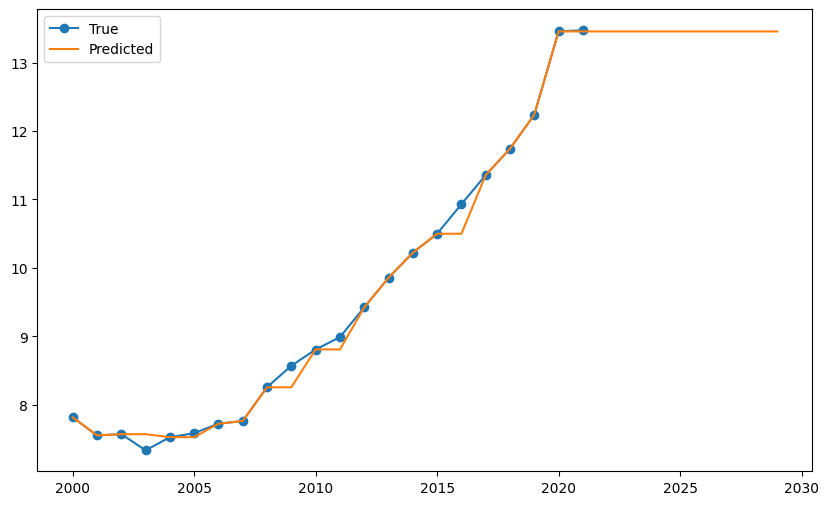

In [ ]:
x_new = np.arange(2000, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = model_xgb.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted')
plt.legend()
plt.show()

In [ ]:
# Divisão de dados temporais
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Modelo
    model_xgb = xgb.XGBRegressor()
    model_xgb.fit(x_train, y_train)
    y_pred_xgb = model_xgb.predict(x_test)

    # Avaliação
    scoring(model_xgb, "XGBRegressor() Time Series Split (000-021)", x_test, y_test, 10)

Model Performance
Mean Absolute Error: 0.4731.
Mean Squared Error: 0.3344.
R^2 Score = -2.0247.
Accuracy = 94.39%.
Model Performance
Mean Absolute Error: 0.5043.
Mean Squared Error: 0.3211.
R^2 Score = -3.8124.
Accuracy = 94.52%.
Model Performance
Mean Absolute Error: 0.7701.
Mean Squared Error: 0.6625.
R^2 Score = -8.5490.
Accuracy = 92.51%.
Model Performance
Mean Absolute Error: 0.8448.
Mean Squared Error: 0.8234.
R^2 Score = -6.5075.
Accuracy = 92.63%.
Model Performance
Mean Absolute Error: 1.3148.
Mean Squared Error: 2.0622.
R^2 Score = -5.1826.
Accuracy = 90.11%.


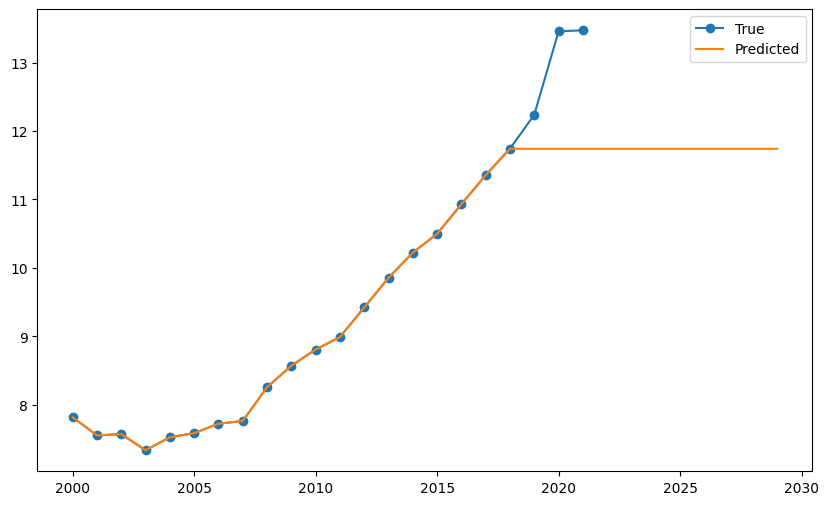

In [ ]:
x_new = np.arange(2000, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = model_xgb.predict(x_new)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted')
plt.legend()
plt.show()

### Teste tirando o ultimo valor do Dataset

In [ ]:
mid_point = 35
x = x_0[mid_point:]
y = y_0[mid_point:]

In [ ]:
#Tirar o ultimo valor

x_cut = x[:20]
y_cut = y[:20]
len(x_cut)

20

In [ ]:
x_train_cut, x_test_cut, y_train_cut, y_test_cut = train_test_split(x_cut, y_cut, test_size=0.25)

In [ ]:
model_xgb = xgb.XGBRegressor()

model_xgb.fit(x_train_cut, y_train_cut)

y_pred_xgb = model_xgb.predict(x_test_cut)

scoring(model_xgb, "XGBRegressor() 0.25 Split Cut (000-021)", x_test_cut, y_test_cut, 10)

Model Performance
Mean Absolute Error: 0.3539.
Mean Squared Error: 0.1388.
R^2 Score = 0.9614.
Accuracy = 96.12%.


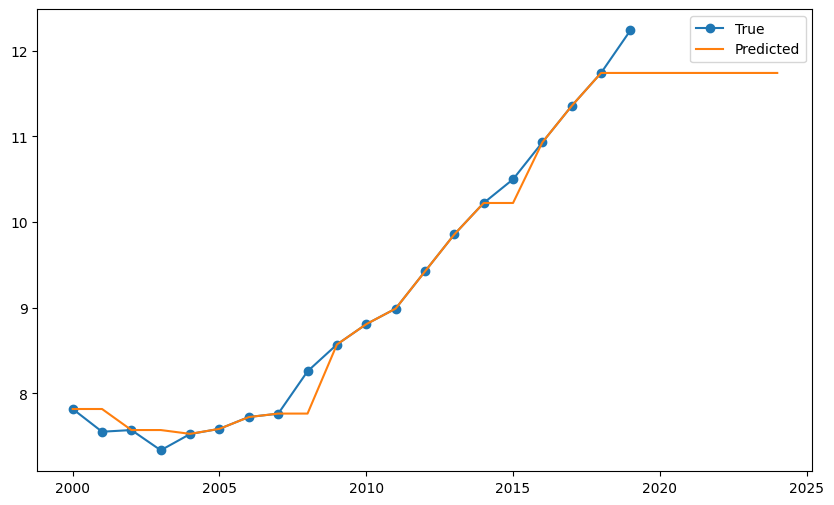

In [ ]:
x_new_cut = np.arange(2000, 2025, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new_cut = x_new_cut.reshape(-1,1)

y_pred_cut = model_xgb.predict(x_new_cut)
plt.figure(figsize=(10, 6))
plt.plot(x_cut, y_cut, label='True', marker='o')
plt.plot(x_new_cut, y_pred_cut, label='Predicted')
plt.legend()
plt.show()

In [ ]:
y_pred_cut

array([ 7.8174853,  7.8174853,  7.5719466,  7.5719466,  7.5272965,
        7.585996 ,  7.723223 ,  7.7640805,  7.7640805,  8.570238 ,
        8.807711 ,  8.989104 ,  9.423279 ,  9.855391 , 10.222154 ,
       10.222154 , 10.930072 , 11.355762 , 11.739936 , 11.739936 ,
       11.739936 , 11.739936 , 11.739936 , 11.739936 , 11.739936 ],
      dtype=float32)

### Gráfico com legenda

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

model_xgb = xgb.XGBRegressor()

model_xgb.fit(x_train, y_train)

y_pred_xgb = model_xgb.predict(x_test)

scoring(model_xgb, "XGBRegressor() 0.25 Split (000-021)", x_test, y_test, 9)

Model Performance
Mean Absolute Error: 0.3361.
Mean Squared Error: 0.1732.
R^2 Score = 0.9651.
Accuracy = 96.62%.


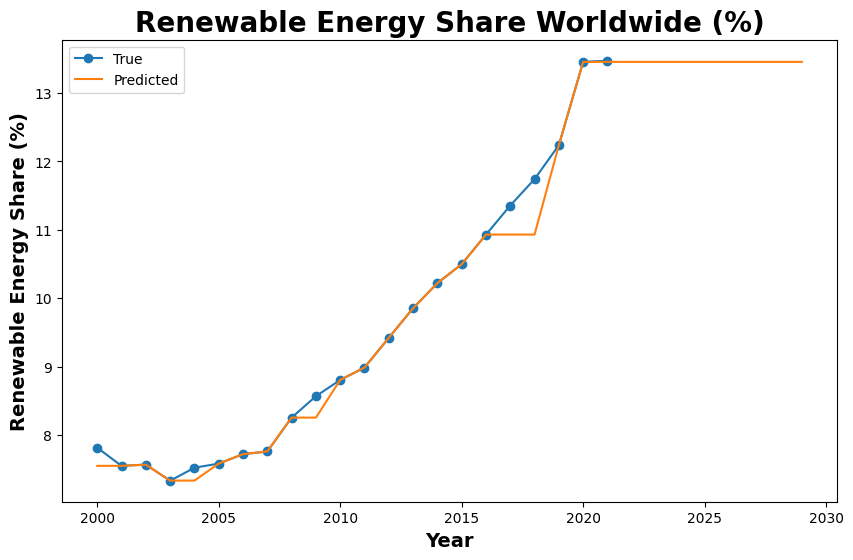

In [ ]:
x_new = np.arange(2000, 2030, 1) #Vamos aumentar a quantidade de "anos" em X, já que queremos a previsão até 2030
x_new = x_new.reshape(-1,1)

y_pred = model_xgb.predict(x_new)

title_font_size = 20
label_font_size = 14
line_width = 2.5

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True', marker='o')
plt.plot(x_new, y_pred, label='Predicted')
plt.title('Renewable Energy Share Worldwide (%)', fontsize=title_font_size, fontweight='bold')
plt.xlabel('Year', fontsize=label_font_size, fontweight='bold')
plt.ylabel('Renewable Energy Share (%)', fontsize=label_font_size, fontweight='bold')
plt.legend()
plt.show()



# Avaliação

In [ ]:
df_results

,Algorithm,r2 score,accuracy,MAE,MSE
1,LinearRegression(),0.97817,97.58435,0.19592,0.05449
2,Implemented LinearRegression(),0.97263,96.23652,0.30091,0.12462
3,RandomForestRegressor() Time Series Split (64-...,-3.90588,86.59041,1.72226,3.72560
4,RandomForestRegressor() 0.25 Split (64-021),0.98627,73.03476,0.19986,0.06821
5,RandomForestRegressor() Time Series Split (000...,-43130.54518,87.88071,1.63163,2.66228
6,RandomForestRegressor() 0.25 Split (000-021),0.98546,80.72593,0.18083,0.04047
7,XGBRegressor() 0.25 Split (64-021),0.94245,96.97926,0.28038,0.24415
8,XGBRegressor() Time Series Split (64-021),-3.05542,88.19632,1.52326,3.07974
9,XGBRegressor() 0.25 Split (000-021),0.98622,97.71552,0.20589,0.06266
10,XGBRegressor() Time Series Split (000-021),-5.18263,90.11071,1.31478,2.06220
